In [1]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})

pi2 = 2*np.pi

print(sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


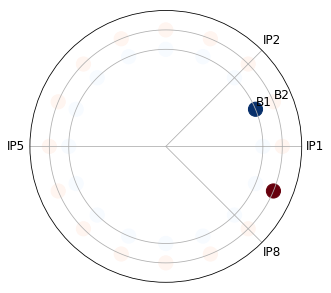

In [2]:
Slots = 16
ang = pi2*np.linspace(0,1,Slots,endpoint=False)
B1 = np.zeros(Slots)
B2 = np.zeros(Slots)
B1[0] = 1
B2[0] = 1
B1_r = 1
B2_r = 1.2

ang+=pi2/Slots

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.scatter(ang,np.ones_like(ang)*B1_r,c = B1,s=200,cmap='Blues')
ax.scatter(-ang,np.ones_like(ang)*B2_r,c = B2,s=200,cmap='Reds',vmin=0, vmax=1)
ax.set_xticks(np.pi*np.array([0,1/4,1,7/4]))  ;   ax.set_xticklabels(['IP1','IP2','IP5','IP8'])
ax.set_yticks([B1_r,B2_r])  ;  ax.set_yticklabels(['B1','B2'])

ax.set_rmax(1.4)
print(B1)

a 1.0 0.941858714747


NameError: name 'a' is not defined

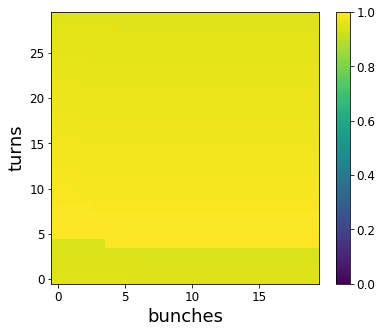

In [3]:
def pcolor_edges(x,y):
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    x = np.concatenate(([x[0]-dx],x))+dx*0.5
    y = np.concatenate(([y[0]-dy],y))+dy*0.5
    return np.meshgrid(x,y)
    

Nb = 20
Nt = 30
r=0.0001
b = np.arange(Nb)
t = np.arange(Nt)
B,T = np.meshgrid(b,t)
# a= np.zeros((Nb,Nt))
Bplot, Tplot = pcolor_edges(b,t)
ti = 4
bi = 4
# Ti = np.roll(T,shift = ti, axis=0)
Ti = -(Nt-T+ti)%Nt   
Bi = -(Nb-B+bi)%Nb
Ti[B<bi]-=1
Ti = Ti%Nt

a1= 1*np.exp(-(Ti*Nb+Bi)*r)

plt.figure()
plt.pcolormesh(Bplot,Tplot,a1,vmin = 0)
plt.xlim(np.min(Bplot),np.max(Bplot))
plt.ylim(np.min(Tplot),np.max(Tplot))
plt.xlabel('bunches')
plt.ylabel('turns')
plt.colorbar()
print('a',np.max(a1),np.min(a1))
print(a.shape, B.shape)
print('T',np.max(T),np.min(T))
print('Ti',np.max(Ti),np.min(Ti))


if 1:
    a[:]=0
    for i in range(0,15):
        ti = i%Nt
        for j in range(0,Nb):
            bi = j
            a[ti,bi] = 0
            Ti = -(Nt-T+ti)%Nt   
            Bi = -(Nb-B+bi)%Nb
            Ti[B<bi]-=1
            Ti = Ti%Nt
            a+= 1*np.exp(-(Ti*Nb+Bi)*r)


    plt.figure()
    plt.pcolormesh(Bplot,Tplot,a,vmin = 0)
    plt.xlim(np.min(Bplot),np.max(Bplot))
    plt.ylim(np.min(Tplot),np.max(Tplot))
    plt.xlabel('bunches')
    plt.ylabel('turns')
    plt.colorbar()


In [7]:
print(Bi)
print(Ti)

[[16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13

In [80]:
off = 1
x = np.arange(10)
print((x-off))
print((x-off)%10)
print(-(off+10-x)%10)


[-1  0  1  2  3  4  5  6  7  8]
[9 0 1 2 3 4 5 6 7 8]
[9 0 1 2 3 4 5 6 7 8]


In [95]:
np.array(np.shape(T)) +[1,1]

array([31, 21])

In [99]:
x = np.concatenate((x,[1]))

# Parallisation

In [210]:
def status(tot_times, times, bool_trained,bool_turnbyturn):
    print('trained=',bool_trained, ', turnbyturn=',bool_turnbyturn)
    print('cpu times ',tot_times)
    print('wall times',np.max(times,axis=1))
    print('max CPU time = ',np.max(tot_times))
    print('max wall time =',np.max(times))

bool_trained    = 1
bool_turnbyturn = 0
bool_annotate   = 1
bool_BB         = 1
bool_Wake       = 0
wake_fac        = 0.1

nB     = 14
nLR    = 4
nTurns = 3

onetwo = np.array([1,2])

# nSteps = (1+nLR*2) + 2 + 1 + 1
tHO=2
tLR=0.5
tWake = nB*wake_fac
tKick = nB*wake_fac
tInd = (tHO)*2


tself=tother=0
tlist = [0,tHO,tLR,tWake,tKick,tInd]
actList = [0,1,2,3,4,5]
BBpipe = np.concatenate((np.ones(nLR)*2,[1],np.ones(nLR)*2),axis=0)
pipeline= np.concatenate((BBpipe,[5],[3,4]),axis=0)


# pipeline_shift=np.zeros_like(pipeline).astype(np.int32)
# for i,act in enumerate(pipeline[:-2]):
#     cnt=0
#     if act ==1 or act==2:
#         if np.any(pipeline[i+1]==np.array([1,2])): 
#             cnt+=1
#             if np.any(pipeline[i+2]==np.array([1,2])): cnt+=1
#         pipeline_shift[i]=cnt
# pipeline_shift[pipeline==1] *= bool_BB
# pipeline_shift[pipeline==2] *= bool_BB

pipeline[pipeline==1] *= bool_BB
pipeline[pipeline==2] *= bool_BB
pipeline[pipeline==3] *= bool_Wake
pipeline[pipeline==4] *= bool_Wake

print(pipeline)
# print(pipeline_shift)
nSteps = np.size(pipeline)


B1 = np.arange(nB)
B2 = np.arange(nB)

actions = np.zeros((nB,nSteps*nTurns))
times = np.zeros((nB,nSteps*nTurns+2))
act_times = np.zeros((nB,nSteps*nTurns+2))
tot_times = np.zeros(nB)

step_tot=0
for turn in range(nTurns):
    if bool_turnbyturn:
        times[:,step_tot+1] = np.max(times[:,step_tot+1])
    
    for b in range(nB):
        cnt = -nLR
        for step in range(nSteps):
            bool_BB_now = 0
            step_tot = nSteps*turn+step
            
            actions[b,step_tot] = pipeline[step]

            # if enter BB interaction area
            if step>0:
                if np.any(pipeline[step]==np.array([1,2])) and \
                np.all(pipeline[step-1]!=np.array([1,2])):
                    cnt=-nLR



            # Check if BB interaction now or not
            bool_BB_now = np.any(actions[b,step_tot]==onetwo)
            if bool_BB_now:
                if (b+cnt<0 or b+cnt>nB-1) and bool_trained and cnt!=0:
                    actions[b,step_tot]=0
                    bool_BB_now = 0
                cnt+=1
            
            
            
            # Wake field chronology            
#             if actions[b,step_tot]==4 and turn>0 and b==0:
#                 shift = -nSteps
#             if b ==0 and turn ==0:
#                 if step_tot ==0:
#                     times[b,step_tot]=0
#                 else:
#                     times[b,step_tot] = times[b,step_tot-1] + action_time 
#             else:


#             if 0:
#                 # cannot start before previous is done with it
#                 if step_tot == 0:
#                     times[b,step_tot] = times[b-1,step_tot+shift]
#                 else:
#                     times[b,step_tot] = np.max([times[b-1,step_tot+shift], \
#                                                 times[b,step_tot]])
#             else:

            action_time = tlist[int(actions[b,step_tot])]    
            act_times[b,step_tot] = action_time
            tot_times[b] += action_time
            
            # cannot start before it is ready for you
            tself = times[b,step_tot]
            tother=0
            if bool_BB_now:
                cnt-=1
                shift = 0
                
                if b+cnt>=0 and b+cnt <= nB-1:
                    tother = times[b+cnt,step_tot-2*cnt]
                if b+cnt<0:
                    tother = times[b-1,step_tot+1] + act_times[b-1,step_tot+1]
                if b+cnt>=nB:
                    tother = times[b,step_tot]
                
                cnt+=1
#                 print(b,step,tother,tself)
            if actions[b,step_tot]==4 and turn>0:
                step_shift = [0,-nSteps][b==0]
                tother = times[b-1,step_tot+step_shift]

            times[b,step_tot] =max(tself,tother) # max(times[b-1,step_tot+shift],tself)
            
            
            
            
            times[b,step_tot+1] = times[b,step_tot] + action_time
            
            
                
            
# print(times)
# times[0,actions[0,:]==5] +=1
            
#Ensure proper causality of LR beambeam
if 1:
    for turn in range(nTurns):
        for b in range(nB):
            cnt = -nLR
            for step in range(nSteps):
                step_tot = nSteps*turn+step
                if step>0:
                    if np.any(pipeline[step]==onetwo) and \
                    np.all(pipeline[step-1]!=onetwo):
                        cnt=-nLR
                
                if np.any(pipeline[step]==onetwo):
                    LR_buddy = b+cnt
                    if cnt>0 and (LR_buddy<nB):
                        ta = times[b,step_tot]
                        tb = times[LR_buddy,step_tot-cnt*2]
                        if ta<tb:
                            times[b,step_tot]+= (tb-ta)
                    cnt+=1
                    
                if step_tot>0:
                    times[b,step_tot] =max(times[b,step_tot],\
                                           times[b,step_tot-1]+act_times[b,step_tot-1])
            
            
if 0:
    print(times)
    print(actions)

status(tot_times, times, bool_trained,bool_turnbyturn)

[ 2.  2.  2.  2.  1.  2.  2.  2.  2.  5.  0.  0.]
trained= 1 , turnbyturn= 0
cpu times  [ 24.   25.5  27.   28.5  30.   30.   30.   30.   30.   30.   28.5  27.
  25.5  24. ]
wall times [ 37.   39.5  41.5  43.5  45.5  47.5  48.5  50.   52.5  55.   57.   59.
  61.   63. ]
max CPU time =  30.0
max wall time = 63.0


trained= 1 , turnbyturn= 0
cpu times  [ 24.   25.5  27.   28.5  30.   30.   30.   30.   30.   30.   28.5  27.
  25.5  24. ]
wall times [ 37.   39.5  41.5  43.5  45.5  47.5  48.5  50.   52.5  55.   57.   59.
  61.   63. ]
max CPU time =  30.0
max wall time = 63.0


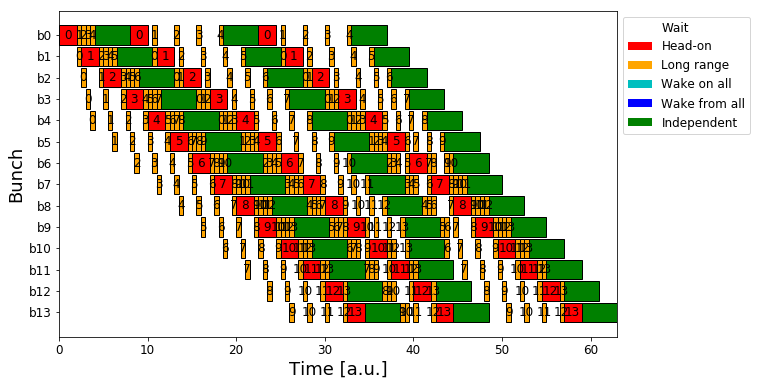

In [211]:
mpl_fig = plt.figure(figsize=(10,6))
ax = mpl_fig.add_subplot(111)

ind = np.arange(nB)    # the x locations for the groups
height = 0.9       # the width of the bars: can also be len(x) sequence
yticks = ind  #+ height/2.
cols = ['w','r','orange','c','b','g']
for i in actList:
    ax.barh(0,0,0,color=cols[i],left =0,label=['Wait','Head-on','Long range',\
                                               'Wake on all','Wake from all','Independent'][i])
    
for b in range(nB):
#     ax.barh(b,act_times[b,:],height,times[b,:], \
#                         color=cols[int(actions[b,step_tot])],
#                        edgecolor ='k')

    for turn in range(nTurns):
        cnt = -nLR
        for step in range(nSteps):
            step_tot = turn*nSteps + step

            if actions[b,step_tot]>0:
                ax.barh(b,tlist[int(actions[b,step_tot])],height, \
                        color=cols[int(actions[b,step_tot])],left =times[b,step_tot],
                       edgecolor ='k')

                if np.any(int(actions[b,step])==np.array([1,2])) and bool_annotate :
                    ax.annotate(b+cnt,xy =(times[b,step_tot]+0.5*tlist[int(actions[b,step_tot])],yticks[b]),\
                                ha='center',va='center')
            if np.any(int(pipeline[step])==np.array([1,2])):
                cnt+=1
# p1 = ax.barh(ind,menMeans,   height, color=(0.2588,0.4433,1.0))
# p2 = ax.barh(ind,womenMeans,  height, color=(1.0,0.5,0.62),left=menMeans)
ax.set_ylabel('Bunch')
ax.set_xlabel('Time [a.u.]')
# ax.set_title('Scores by group and gender')

ax.set_ylim(ax.get_ylim()[::-1])
ax.set_yticks(yticks )#
ax.set_yticklabels(('b'+str(i) for i in ind))#('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_xticks(np.arange(0, 81, 10))
ax.set_xlim(0,np.max(times))
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
# ax.grid(True)



status(tot_times, times, bool_trained,bool_turnbyturn)

You cannot get perfect load balancing between the bunches.

Must try to implement such that resources aren't idling when the bunch is idling.